# Pytorch Neural Network - Classification

## 1. Data Preprocess
We must prepare the data for the neural network.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Load scikit-learn breast cancer data set.

Then we load the features into a 2D array (matrix X - all features) and load the target into a vector (vector Y - classification)

Malignant - 1
Benign = 0

In [13]:
data = load_breast_cancer()
X = data.data.astype(np.float32)
y = data.target.astype(np.float32).reshape(-1, 1)
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.

Normalize the input features. We want the *mean 0* and the *standard deviation 1*. All features are centered and scaled evenly. Neural networks learn faster and better when input features are on a similar scale. Without normalization, some features can dominate others. We only normalize the input features.

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

We must split the data into training and validation. This ensures we have a way to test our neural network without giving the model access to "answers" during training.

- X_train is our input feature training split
- y_train is our target for training split (the answers)
- X_val is the input feature for validation
- y_val is our target for validation


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

[[-1.4479871  -0.4560234  -1.3666509  ...  0.91959167  2.14719
   1.8594325 ]
 [ 1.9775081   1.6941866   2.0896187  ...  2.6752186   1.9368784
   2.4634647 ]
 [-1.4070891  -1.2635157  -1.3497629  ... -0.9704858   0.61676985
   0.05287678]
 ...
 [ 0.04621144 -0.5747039  -0.06874768 ... -1.2375603  -0.71628153
  -1.260478  ]
 [-0.04183308  0.0768752  -0.03497174 ...  1.0368364   0.45013824
   1.1944426 ]
 [-0.55305845  0.28631115 -0.6075156  ... -0.61357445 -0.33448535
  -0.8404263 ]]
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [

Convert all the data, both training and validation sets into pytorch tensors, so the neural network can work with the data.


In [16]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_val   = torch.tensor(X_val)
y_val   = torch.tensor(y_val)
print(X_train.shape)
print(y_train.shape)

torch.Size([455, 30])
torch.Size([455, 1])


## 2. Neural Network Architecture
Design of the neural network ie; layers, forward pass, loss-function, and optimizer.

Define the neural network model (input layers and hidden layers). This is the "forward pass".
- build a sequential network
- we use linear layers that performs $z = W \cdot x + b$
- ReLU is our activation function to introduce non-linearity after each layer, allows the network to learn complex patterns and zeros out negatives (Like sigmoid but a different activation function).
- For classification, we also apply the activation function (sigmoid) after the final output layer which is part of the loss function.

In [17]:
model = nn.Sequential(
    nn.Linear(30, 64),      # Input layer → Hidden layer 1 (64 neurons created from the 11 input features)
    nn.ReLU(),
    nn.Linear(64, 32),      # Hidden layer 1 → Hidden layer 2 (64 inputs from the previous layers outputs, outputs 32 neurons)
    nn.ReLU(),
    nn.Linear(32, 1)        # Hidden layer 2 → Output (1 value: wine quality)
)

The loss function (BCE) is applied right after we get the final output from the network’s forward pass and right before backpropagation. It measures how far off the prediction is from the actual target. For classification we use **BCEWithLogitsLoss()** which includes sigmoid activation.

The optimizer is what updates the weights and biases based on the gradient of the loss. It uses the learning rate to decide how much to adjust the weights in response to the gradients.

In [18]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## 3. Training Loop
Actually apply the forward pass, loss function, optimizer and the back propagation.

Training loop explanation in order:

- **epochs = 100** - 100 epochs or 100 full iterations of training
- **model.train()** - tells pytorch the model is in training mode
- **optimizer.zero_grad()** - we clear the 0's that were stored from the previous back propagation
- **output = model(X_train)** - actually pass in our training data and initiate the forward pass
- **loss = loss_function(output, y_train)** - compute the MSE loss by passing in the model outputs and the actual answers (quality)
- **loss.backward()** - perform backward propagation, where we compute and apply gradient descent (derivative of loss)
- **optimizer.step()** - applies the gradients (calculated during loss.backward()) to update the model’s weights and biases

In [19]:
train_losses, val_losses = [], []
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train)
    loss = loss_function(output, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = loss_function(val_output, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

Epoch 0 | Train Loss: 0.7114 | Val Loss: 0.6102
Epoch 10 | Train Loss: 0.0805 | Val Loss: 0.0479
Epoch 20 | Train Loss: 0.0475 | Val Loss: 0.0609
Epoch 30 | Train Loss: 0.0234 | Val Loss: 0.0829
Epoch 40 | Train Loss: 0.0107 | Val Loss: 0.0880
Epoch 50 | Train Loss: 0.0045 | Val Loss: 0.1053
Epoch 60 | Train Loss: 0.0019 | Val Loss: 0.1241
Epoch 70 | Train Loss: 0.0009 | Val Loss: 0.1343
Epoch 80 | Train Loss: 0.0006 | Val Loss: 0.1406
Epoch 90 | Train Loss: 0.0004 | Val Loss: 0.1443


## 4. Evaluation
Below we will
 - plot the loss to see how the model is minimizing loss and learning
 -


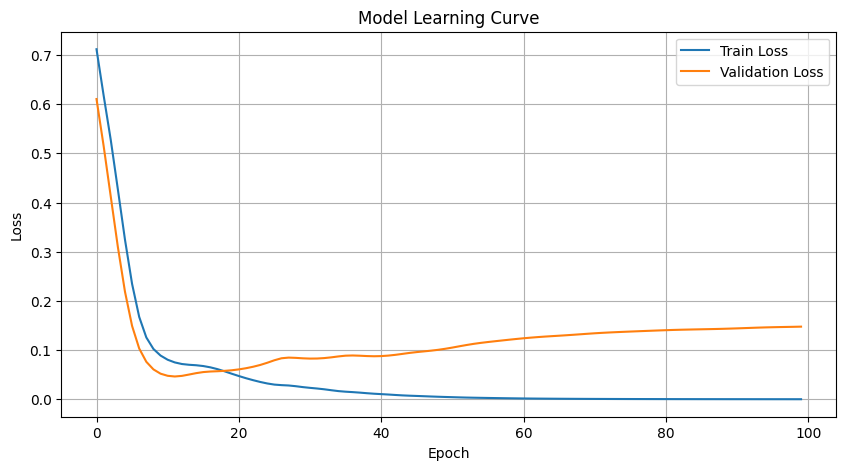

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

As you can see here, we are starting to get some overfitting. Our validation loss is going up while our train loss is staying the same.